In [1]:
import os
import numpy as np
import pandas as pd
import random
import string
random.seed(123)
import datetime as dt

# import warnings
# warnings.filterwarnings('ignore','RuntimeWarning')

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = pd.read_csv('amazon_reviews/amazon_reviews.csv')

In [3]:
data1

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2
5,an absolute masterpiece: I am quite sure any ...,__label__2
6,"Buyer beware: This is a self-published book, ...",__label__1
7,Glorious story: I loved Whisper of the wicked...,__label__2
8,A FIVE STAR BOOK: I just finished reading Whi...,__label__2
9,Whispers of the Wicked Saints: This was a eas...,__label__2


In [6]:
data1.label.value_counts()

__label__1     5097
__label__2     4903
Name: label, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.text,data1.label,test_size=0.3, random_state=1234)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# TF-IDF feature matrix
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [13]:
logreg = LogisticRegression()
lr_clf = logreg.fit(tfidf_train,y_train)

train_pred = lr_clf.predict(tfidf_train)

test_pred = lr_clf.predict(tfidf_test)

In [14]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [15]:
print('Scores for Train')
print('ACC :',accuracy_score(y_train,train_pred))
print('RECALL :',recall_score(y_train,train_pred,pos_label='__label__1 '))
print('PRECISION :',precision_score(y_train,train_pred,pos_label='__label__1 '))
print('F1_SCORE :',f1_score(y_train,train_pred,pos_label='__label__1 '))

Scores for Train
ACC : 0.9405714285714286
RECALL : 0.9364323718846261
PRECISION : 0.9465043872063402
F1_SCORE : 0.9414414414414414


In [16]:
print('Scores for Test')
print('ACC :',accuracy_score(y_test,test_pred))
print('RECALL :',recall_score(y_test,test_pred,pos_label='__label__1 '))
print('PRECISION :',precision_score(y_test,test_pred,pos_label='__label__1 '))
print('F1_SCORE :',f1_score(y_test,test_pred,pos_label='__label__1 '))

Scores for Test
ACC : 0.8426666666666667
RECALL : 0.8479685452162516
PRECISION : 0.8435462842242504
F1_SCORE : 0.8457516339869281


In [17]:
from sklearn.svm import SVC

In [23]:
svm_classifier = SVC(kernel="linear", class_weight="balanced")
svm_clf = svm_classifier.fit(tfidf_train,y_train)

train_pred = svm_clf.predict(tfidf_train)

test_pred = svm_clf.predict(tfidf_test)


In [24]:
print('Scores for Train')
print('ACC :',accuracy_score(y_train,train_pred))
print('RECALL :',recall_score(y_train,train_pred,pos_label='__label__1 '))
print('PRECISION :',precision_score(y_train,train_pred,pos_label='__label__1 '))
print('F1_SCORE :',f1_score(y_train,train_pred,pos_label='__label__1 '))
print('Scores for Test')
print('ACC :',accuracy_score(y_test,test_pred))
print('RECALL :',recall_score(y_test,test_pred,pos_label='__label__1 '))
print('PRECISION :',precision_score(y_test,test_pred,pos_label='__label__1 '))
print('F1_SCORE :',f1_score(y_test,test_pred,pos_label='__label__1 '))

Scores for Train
ACC : 0.9722857142857143
RECALL : 0.9680761691402968
PRECISION : 0.9773819621147866
F1_SCORE : 0.9727068092290377
Scores for Test
ACC : 0.8376666666666667
RECALL : 0.8250327653997379
PRECISION : 0.8512508451656524
F1_SCORE : 0.837936772046589


In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
svm_clf

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
param_grid = {'C':[1,5,10],
             'gamma':[0.1,0.5,0.9]}

In [29]:
svm_grid = GridSearchCV(SVC(kernel="rbf"),param_grid,n_jobs=-1)

In [30]:
svm_clf = svm_grid.fit(tfidf_train,y_train)

train_pred = svm_clf.predict(tfidf_train)

test_pred = svm_clf.predict(tfidf_test)

In [31]:
svm_grid.best_params_

{'C': 5, 'gamma': 0.9}

In [32]:
print('Scores for Train')
print('ACC :',accuracy_score(y_train,train_pred))
print('RECALL :',recall_score(y_train,train_pred,pos_label='__label__1 '))
print('PRECISION :',precision_score(y_train,train_pred,pos_label='__label__1 '))
print('F1_SCORE :',f1_score(y_train,train_pred,pos_label='__label__1 '))
print('Scores for Test')
print('ACC :',accuracy_score(y_test,test_pred))
print('RECALL :',recall_score(y_test,test_pred,pos_label='__label__1 '))
print('PRECISION :',precision_score(y_test,test_pred,pos_label='__label__1 '))
print('F1_SCORE :',f1_score(y_test,test_pred,pos_label='__label__1 '))

Scores for Train
ACC : 1.0
RECALL : 1.0
PRECISION : 1.0
F1_SCORE : 1.0
Scores for Test
ACC : 0.8453333333333334
RECALL : 0.8466579292267365
PRECISION : 0.8488830486202366
F1_SCORE : 0.8477690288713912


In [42]:
svm_classifier = SVC(kernel="rbf", C=5,gamma=0.9)
svm_clf = svm_classifier.fit(tfidf_train,y_train)

train_pred = svm_clf.predict(tfidf_train)

test_pred = svm_clf.predict(tfidf_test)


1 Star - The write speeds are only 15Mbps of Maximum. Its almost equal to USB 2.0
My two stars are only for reading speed. Please donot cheat the customers. In your description it is given as 10 times than 2.0 but its not.

In [59]:
live_test1 = "The write speeds are only 15Mbps of Maximum. Its almost equal to USB 2.0 My two stars are only for reading speed. Please donot cheat the customers. In your description it is given as 10 times than 2.0 but its not."

In [60]:
live_test1 = pd.core.series.Series(live_test1)

In [61]:
tfidf_live_test1 = tfidf_vectorizer.transform(live_test1)

In [62]:
svm_clf.predict(tfidf_live_test1)

array(['__label__1 '], dtype=object)

1 Star - I purchased this pen drive but it came write protected and not able to use it.

In [66]:
live_test2 = "I purchased this pen drive but it came write protected and not able to use it."
live_test2 = pd.core.series.Series(live_test2)
tfidf_live_test2 = tfidf_vectorizer.transform(live_test2)

In [67]:
svm_clf.predict(tfidf_live_test2)

array(['__label__1 '], dtype=object)

5 Star - Good quality and great performance. U can take the USB inside after using so there is no chance of breaking by accident.

In [70]:
live_test3 = "Good quality and great performance. U can take the USB inside after using so there is no chance of breaking by accident."
live_test3 = pd.core.series.Series(live_test3)
tfidf_live_test3 = tfidf_vectorizer.transform(live_test3)

In [71]:
svm_clf.predict(tfidf_live_test3)

array(['__label__2 '], dtype=object)

### Neural Networks

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import GlobalMaxPooling1D, AveragePooling1D,Conv1D,Dropout,Embedding,MaxPooling1D,LSTM

Using TensorFlow backend.


In [74]:
CONTRACTION_MAP = {"ain't": 'is not', "aren't": 'are not', "can't": 'cannot', "can't've": 'cannot have', "'cause": 'because', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'd've": 'he would have', "he'll": 'he will', "he'll've": 'he he will have', "he's": 'he is', "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have', "I'm": 'I am', "I've": 'I have', "i'd": 'i would', "i'd've": 'i would have', "i'll": 'i will', "i'll've": 'i will have', "i'm": 'i am', "i've": 'i have', "isn't": 'is not', "it'd": 'it would', "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam', "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have', "mustn't": 'must not', "mustn't've": 'must not have', "needn't": 'need not', "needn't've": 'need not have', "o'clock": 'of the clock', "oughtn't": 'ought not', "oughtn't've": 'ought not have', "shan't": 'shall not', "sha'n't": 'shall not', "shan't've": 'shall not have', "she'd": 'she would', "she'd've": 'she would have', "she'll": 'she will', "she'll've": 'she will have', "she's": 'she is', "should've": 'should have', "shouldn't": 'should not', "shouldn't've": 'should not have', "so've": 'so have', "so's": 'so as', "that'd": 'that would', "that'd've": 'that would have', "that's": 'that is', "there'd": 'there would', "there'd've": 'there would have', "there's": 'there is', "they'd": 'they would', "they'd've": 'they would have', "they'll": 'they will', "they'll've": 'they will have', "they're": 'they are', "they've": 'they have', "to've": 'to have', "wasn't": 'was not', "we'd": 'we would', "we'd've": 'we would have', "we'll": 'we will', "we'll've": 'we will have', "we're": 'we are', "we've": 'we have', "weren't": 'were not', "what'll": 'what will', "what'll've": 'what will have', "what're": 'what are', "what's": 'what is', "what've": 'what have', "when's": 'when is', "when've": 'when have', "where'd": 'where did', "where's": 'where is', "where've": 'where have', "who'll": 'who will', "who'll've": 'who will have', "who's": 'who is', "who've": 'who have', "why's": 'why is', "why've": 'why have', "will've": 'will have', "won't": 'will not', "won't've": 'will not have', "would've": 'would have', "wouldn't": 'would not', "wouldn't've": 'would not have', "y'all": 'you all', "y'all'd": 'you all would', "y'all'd've": 'you all would have', "y'all're": 'you all are', "y'all've": 'you all have', "you'd": 'you would', "you'd've": 'you would have', "you'll": 'you will', "you'll've": 'you will have', "you're": 'you are', "you've": 'you have'}

In [75]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    #re.compile(regex).search(subject) is equivalent to re.search(regex, subject).
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match)\
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = re.sub("’", "'", text)
    expanded_text = contractions_pattern.sub(expand_match, expanded_text)

    return expanded_text

In [76]:
# Function to Preprocess the Reviews
def clean_doc(doc):
    # Removing contractions
    doc = expand_contractions(doc)
    
    # split into tokens by white space
    tokens = doc.split(' ')
    
    # Converting into lower case
    tokens = [w.lower() for w in tokens]
    
    # remove special characters from each token
    tokens = [re.sub(r"[^a-zA-Z#\s]",'',i) for i in tokens]
    tokens = [re.sub(r"[\r\n]",'',i) for i in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # lemmatizing
    lmtzr = nltk.stem.WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(w) for w in tokens]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [77]:
data1['modified_review'] = data1.text.apply(lambda x: clean_doc(x))

In [88]:
data1.loc[data1.label == '__label__1 ','label'] = 0
data1.loc[data1.label == '__label__2 ','label'] = 1

In [89]:
X = data1.modified_review
y = data1.label

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1234)

In [90]:
max_num_words = 10000
seq_len = 50
embedding_size = 100

In [91]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_num_words) #Tokenizer is used to tokenize text
tokenizer.fit_on_texts(X_train) #Fit this to our corpus

X_train = tokenizer.texts_to_sequences(X_train) #'text to sequences converts the text to a list of indices
X_train = pad_sequences(X_train, maxlen=50) #pad_sequences makes every sequence a fixed size list by padding with 0s 

X_test = tokenizer.texts_to_sequences(X_test) 
X_test = pad_sequences(X_test, maxlen=50)

X_train.shape, X_test.shape # Check the dimensions of x_train and x_test  

((7000, 50), (3000, 50))

In [92]:
model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(input_dim = max_num_words, 
                    input_length = seq_len, 
                    output_dim = embedding_size)) # Add an embedding layer which represents each unique token as a vector
#model.add(Dropout(rate=0.5))
model.add(LSTM(20, return_sequences=True,dropout=0.9)) # Add an LSTM layer
model.add(LSTM(10, return_sequences=False))
#model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))

In [93]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           1000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 20)            9680      
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,010,931
Trainable params: 1,010,931
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          validation_data=(X_test, y_test),verbose=2)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
 - 11s - loss: 0.6647 - acc: 0.6051 - val_loss: 0.5774 - val_acc: 0.7227
Epoch 2/20
 - 8s - loss: 0.5364 - acc: 0.7364 - val_loss: 0.4716 - val_acc: 0.7847
Epoch 3/20
 - 8s - loss: 0.4703 - acc: 0.7786 - val_loss: 0.4298 - val_acc: 0.8087
Epoch 4/20
 - 8s - loss: 0.3977 - acc: 0.8279 - val_loss: 0.4050 - val_acc: 0.8283
Epoch 5/20
 - 8s - loss: 0.3695 - acc: 0.8423 - val_loss: 0.3996 - val_acc: 0.8290
Epoch 6/20
 - 8s - loss: 0.3371 - acc: 0.8566 - val_loss: 0.3922 - val_acc: 0.8370
Epoch 7/20
 - 8s - loss: 0.3169 - acc: 0.8651 - val_loss: 0.3906 - val_acc: 0.8430
Epoch 8/20
 - 8s - loss: 0.2931 - acc: 0.8797 - val_loss: 0.3823 - val_acc: 0.8457
Epoch 9/20
 - 8s - loss: 0.2711 - acc: 0.8894 - val_loss: 0.4124 - val_acc: 0.8500
Epoch 10/20
 - 8s - loss: 0.2630 - acc: 0.8951 - val_loss: 0.3901 - val_acc: 0.8500
Epoch 11/20
 - 8s - loss: 0.2431 - acc: 0.9044 - val_loss: 0.3981 - val_acc: 0.8480
Epoch 12/20
 - 8s - loss: 0.2341 - a

### Feature Extraction from reviews

In [98]:
data1['number_of_sentences'] = [len(i) for i in data1.text]

In [99]:
print('Minimum number of sentences in our reviews is',min(data1['number_of_sentences']))
print('Maximum number of sentences in our reviews is',max(data1['number_of_sentences']))

Minimum number of sentences in our reviews is 102
Maximum number of sentences in our reviews is 1016


In [100]:
label_font = {'fontname':'sans serif','fontsize':15} 
title_font = {'fontname':'sans serif','fontsize':20}

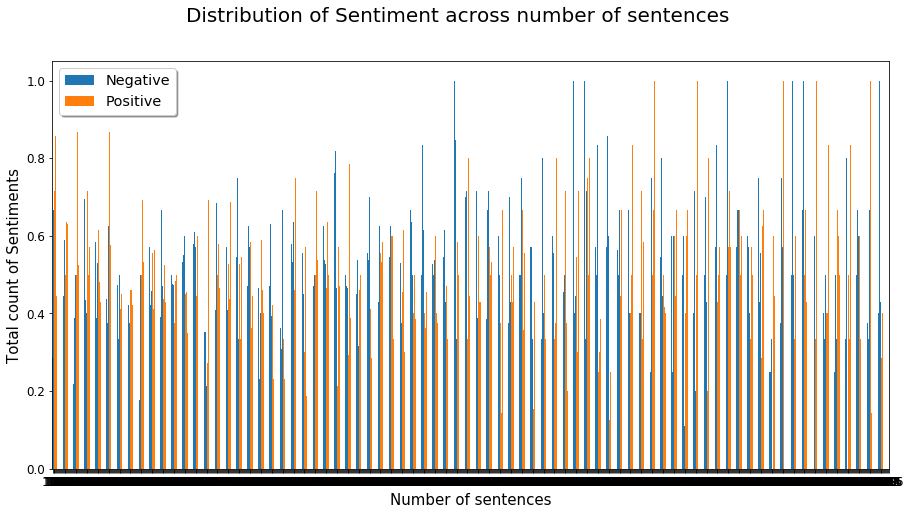

In [102]:
pd.crosstab(data1.number_of_sentences, data1.label,normalize='index').plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of Sentiment across number of sentences',**title_font)
plt.legend(loc=0, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Number of sentences',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

### Comparing polarity and Label.

In [8]:
from textblob import TextBlob

In [9]:
data1['polarity'] = data1['text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [13]:
data1[data1['polarity'] <0].shape

(2428, 3)

In [14]:
data1[data1['polarity'] >0].shape

(7411, 3)

In [15]:
data1[data1['polarity'] ==0].shape

(161, 3)